In [6]:
from PIL import Image
import numpy as np
import cv2
import pandas as pd

In [3]:
# Im=Image.open("fundus_image.jpeg")

In [4]:
# Im

In [18]:
# Convert the image to grayscale
g_Im = Im.convert("L")

# Convert the PIL image to a numpy array
image_np = np.array(g_Im)
Im_np = np.array(Im)

# Find the non-zero regions of the image
non_zero_indices = cv2.findNonZero(image_np)

# Get the bounding box coordinates
x, y, w, h = cv2.boundingRect(non_zero_indices)

# Crop the image using the bounding box coordinates
cropped_image_np = cv2.getRectSubPix(Im_np, (w,h), (x+w//2,y+h//2))

# Convert the numpy array back to a PIL image
c_Im = Image.fromarray(cropped_image_np)


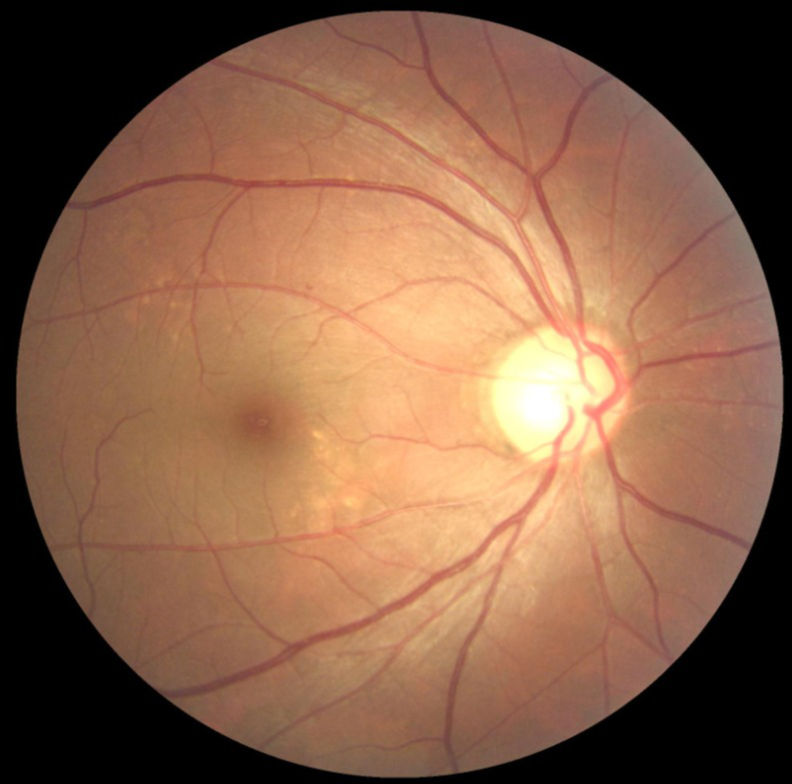

In [19]:
c_Im



In [7]:
# Load the Excel file into a Pandas DataFrame
left_df = pd.read_excel("C:/Users/User/DeepLearning/DL-Project/updated_left_eye.xlsx")

# Get the values of a specific column
column = left_df["Left-Fundus"]

print (column)


0          0_left.jpg
1          1_left.jpg
2          2_left.jpg
3          3_left.jpg
4          4_left.jpg
            ...      
3480    4686_left.jpg
3481    4688_left.jpg
3482    4689_left.jpg
3483    4690_left.jpg
3484    4784_left.jpg
Name: Left-Fundus, Length: 3485, dtype: object


In [8]:
def crop_image(filename):
    Im=Image.open(filename)
    # Convert the image to grayscale
    g_Im = Im.convert("L")

    # Convert the PIL image to a numpy array
    g_Im_np = np.array(g_Im) #gray
    c_Im_np = np.array(Im) #RGB

    # Find the non-zero regions of the image
    non_zero_indices = cv2.findNonZero(g_Im_np)

    # Get the bounding box coordinates
    x, y, w, h = cv2.boundingRect(non_zero_indices)

    # Crop the image using the bounding box coordinates
    cropped_image_np = cv2.getRectSubPix(c_Im_np, (w,h), (x+w//2,y+h//2))

    # Convert the numpy array back to a PIL image
    c_Im = Image.fromarray(cropped_image_np)
    
    return c_Im

In [14]:
for file in column:
    file_path = f'E:/odir-dataset/ODIR-5K/ODIR-5K/Training Images/{file}'
    im = crop_image(file_path)
    #Save the edited image to the new folder
    im.save(f"E:/odir-dataset/ODIR-5K/ODIR-5K/cropped_training_images/{file}")
    

In [16]:
# Load the Excel file into a Pandas DataFrame
right_df = pd.read_excel("C:/Users/User/DeepLearning/DL-Project/updated_right_eye.xlsx")

# Get the values of a specific column
column_2 = right_df["Right-Fundus"]

print (column_2)


0          0_right.jpg
1          1_right.jpg
2          2_right.jpg
3          3_right.jpg
4          4_right.jpg
             ...      
3478    4686_right.jpg
3479    4688_right.jpg
3480    4689_right.jpg
3481    4690_right.jpg
3482    4784_right.jpg
Name: Right-Fundus, Length: 3483, dtype: object


In [17]:
for file in column_2:
    file_path = f'E:/odir-dataset/ODIR-5K/ODIR-5K/Training Images/{file}'
    im = crop_image(file_path)
    #Save the edited image to the new folder
    im.save(f"E:/odir-dataset/ODIR-5K/ODIR-5K/cropped_training_images/{file}")